In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('data/titanic_train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<Axes: ylabel='Frequency'>

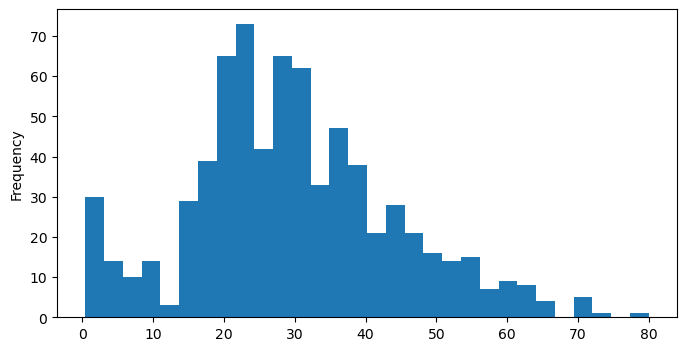

In [26]:
df['Age'].plot.hist(bins=30,figsize=(8,4))

now i'm interested in Class 1 passengers

In [27]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [52]:
class1_passengers_mask.index = [e**2 for e in range(891)]
class1_passengers_mask

0         False
1          True
4         False
9          True
16        False
          ...  
784996    False
786769     True
788544    False
790321     True
792100    False
Name: Pclass, Length: 891, dtype: bool

<Axes: ylabel='Frequency'>

<Axes: ylabel='Frequency'>

<Axes: ylabel='Frequency'>

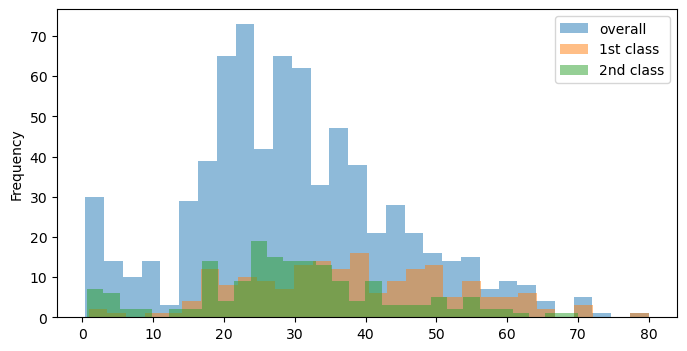

In [61]:
class1_passengers_mask = df['Pclass'] == 1
df['Age'].plot.hist(bins=30,figsize=(8,4),label='overall',alpha=0.5)
df['Age'].loc[class1_passengers_mask].plot.hist(bins=30,figsize=(8,4),label='1st class',alpha=0.5)
df['Age'].loc[df['Pclass'] == 2].plot.hist(bins=30,figsize=(8,4),label='2nd class',alpha=0.5)
plt.legend()

----

In [69]:
males_mask = df['Sex'] == 'male'
above_30_age_mask = df['Age'] > 30

df.loc[males_mask & above_30_age_mask]
#df.loc[males_mask | above_30_age_mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [36]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


----

In [71]:
#df['Ticket'].str.split().str.get(0).value_counts()

pc_ticket_mask = df['Ticket'].str.split().str.get(0) == 'PC'

df.loc[pc_ticket_mask,'Pclass']

1      1
30     0
31     1
34     0
52     1
64     0
96     0
97     1
118    0
139    0
155    0
168    0
177    0
194    1
195    1
256    1
258    1
268    1
269    1
273    0
295    0
299    1
307    1
309    1
311    1
325    1
332    0
334    1
369    1
373    0
375    1
380    1
493    0
505    0
512    1
513    1
527    0
537    1
544    0
557    0
572    1
599    1
609    1
641    1
645    1
660    1
679    1
681    1
700    1
701    1
707    1
710    1
716    1
737    1
742    1
789    0
793    0
835    1
853    1
867    0
Name: Survived, dtype: int64